# Introduction
In Part III, we visualized our data for the store boss who wanted to know how the store was doing over time. 

Encouraged by your analysis, he then asks: 
<blockquote>Can I segment my customers into different categories? I want to focus on them differently.</blockquote>

This is an entirely reasonable request, and so in this Part, we will perform RFM segmentation. 

Here's what each letter means:
1. R (Recency): How recently did this customer purchase something from the store?
2. F (Frequency): Total number of transactions 
3. M (Monetary): Total transaction value

You'll need to rank the customers based on their R, F, or M metric and then assign them scores based on their ranking. Each customer will be assigned a score between 1-5, and the score is based on quintiles.

If quartiles involves separating a collection of values into 4 parts, quintiles involves separating them into 5 parts.

The reading below breaks it down easily for you, so make sure you give it a read!

<strong>Highly</strong> recommended readings:
1. https://clevertap.com/blog/rfm-analysis/ 

In this notebook, you will do the following:
1. Prepare the DataFrame for RFM analysis
2. Get a DataFrame containing R score
3. Get a DataFrame containing F score
4. Get a DataFrame containing M score
5. Combine them into an RFM score
6. Sort the Customer ID into different customer segments based on the RFM score

### Step 1: Import the following library
- pandas

In [1]:
# Step 1: Import the library
import pandas as pd

### Step 2: Read the CSV from Part II as a DataFrame
You know the drill. But this time, it's no necessary to make InvoiceDate the index of the DataFrame. 

![PartIVSanityCheck.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/PartIVSanityCheck.png)

Make sure your CSV has "Revenue", because we'll need that column to calculate M. 

In [2]:
# Step 2: Read the CSV from Part II
df = pd.read_csv('/Users/sm/Desktop/CourseMaterials/Project Sales Analysis v0.2.csv', parse_dates=True, index_col='InvoiceDate')
df

/Users/sm/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60


### Step 3: Drop NA from your DataFrame
We will need Customer ID information, so any rows without Customer ID needs to be removed. 

After removal, expect <strong>805,549 rows by 9 columns</strong>.

In [3]:
# Step 3: Drop your NA from the DataFrame
df.dropna(subset=['Customer ID'], inplace=True)
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60


### Step 4: Prepare Customer ID as string

More specifically, to turn the float values in Customer ID into string without decimals.

You might have noticed that pandas may have mistaken your Customer ID as a float, and your entire column ended up with a decimal place. 

Remove and turn the entire column into string type, without a decimal place.

<strong>Hint: Google "pandas converting floats to strings without decimals"</strong>

In [4]:
# Step 4: Turn Customer ID into a string 
df['Customer ID']=df['Customer ID'].astype('Int64').astype('str')
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 805549 entries, 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   Price        805549 non-null  float64
 5   Customer ID  805549 non-null  object 
 6   Country      805549 non-null  object 
 7   Revenue      805549 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


### Step 5: Prepare InvoiceDate as DateTime object
Your InvoiceDate column may still be a string form. 

You can check using type(), and it is a string type, you'll need to transform the values in the column as a proper DateTime object. We will need this column to calculate R. 

<strong>Hint: Google "turn column into datetime pandas"</strong>

In [6]:
# Step 5: Turn InvoiceDate column values into DateTime objects

## Calculating the R, F, M scores
This is it - we'll start calculating the R, F, M scores.

There's going to be extensive groupby operations, so you'll need to either read up on these operations or refresh your memory from your notes.

Useful reading:
1. https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

### Step 6: Set a reference date for R
We're going to calculate R, and as mentioned R refers to <u>how recent a customer bought something from the store</u>.

That said, how recent is recent? 

Given that the last date in the dataset is 2011-12-09, we can consider 2012-01-01 the reference date.

Declare a variable called <strong>today</strong>, and make sure it is a DateTime object for 2012-01-01.

pandas has a handy method for it - so go find out! 

In [7]:
# Step 6: Create a DateTime object for 2012-01-01
today=pd.to_datetime('2012-01-01')

### Step 7: Calculate days since last purchase
Create a new column named 'days_since_today'.

This column contains the number of the days that elapse since the reference date, i.e. today (2012-01-01). 

\begin{equation*}
days\_since\_today = days\ between \ (today - InvoiceDate)
\end{equation*}

This is not a legit equation - you'll have to figure out how to extract the number of days between two DateTime objects.

There are two ways to do this:
1. Run a for loop and loop through each row and get the number of days between the two days
2. Take 'today', and subtract the entire column of InvoiceDate from it, and extract only the number of days from the resulting TimeDelta object.

![DaysSinceTodayDays.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/DaysSinceTodayDays.png)

<strong>Hint: Google "get number of days between two dates column pandas"</strong>

In [8]:
# Step 7: Create 'days_since_today' column
df['days_since_today']=(today - df.index).days
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,days_since_today
InvoiceDate,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,83.40,760
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.00,760
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.00,760
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,100.80,760
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,30.00,760
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,22
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,22
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,22


### Step 8: Groupby Customer ID and get the minimum days
While we created new column called days_since_today, we will then perform a groupby by the Customer ID that takes the minimum of the grouped data per Customer ID.

In other words, you're looking for days elapsed since the very last time that Customer purchased something. 

There are a few ways to do it - feel free to implement whichever method you see fit. 

If done right - this is the DataFrame of what you'll see:

![DaysSinceTodayGroupBy.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/DaysSinceTodayGroupBy.png)

After you're done, replace the column name with Recency rather than days_since_today.

<strong>Hint 1: The reading at the start of this Part is useful.</strong>

<strong>Hint 2: Google "get minimum groupby python"</strong>

In [9]:
# Step 8: Get a groupby DataFrame that takes the minimum of the days since last purchase
group1=df.groupby('Customer ID').agg({"days_since_today": min})
group1.rename(columns={'days_since_today': 'Recency'}, inplace = True)
group1

,Recency
Customer ID,
12346,347
12347,24
12348,97
12349,40
12350,332
...,...
18283,25
18284,453
18285,682


### Step 9: Get frequency of purchase per customer. 
After we are done with R, we move on to F - frequency. 

This means we're looking at how many times each customer purchased something.

![PurchaseConsideration.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/PurchaseConsideration.png)
 
Take note that there are multiple items per purchase Invoice by one Customer ID. In the calculation for F, it doesn't matter how many items were purchased in a single purchase. You just need to count how many times a Customer purchased something at different times.

There are a few ways to do it:
1. Subset method [Easy]
    - Drop duplicates in the DataFrame, based on the Invoice column subset alone
    - Extract the Customer ID column and do a value count operation
    - Turn the result of the value count into a DataFrame
2. Loop method [Easy, but takes a long time]
    - Get a list of unique Customer ID
    - Drop duplicates in the DataFrame, based on the Invoice column subset alone
    - Use a for loop to loop through the list of IDs, and extract the number of rows that contain the Customer ID
    - Create a new DataFrame that contains the Customer ID and the number of rows
3. Groupby method [Hard]
    - Groupby the DataFrame by both Customer ID and Invoice, followed by a sum operation on Revenue
    - Groupby the DataFrame by Customer ID again, followed by aggregate operation on getting the size of the Revenue
    
All methods are fine, and you will end up with this:

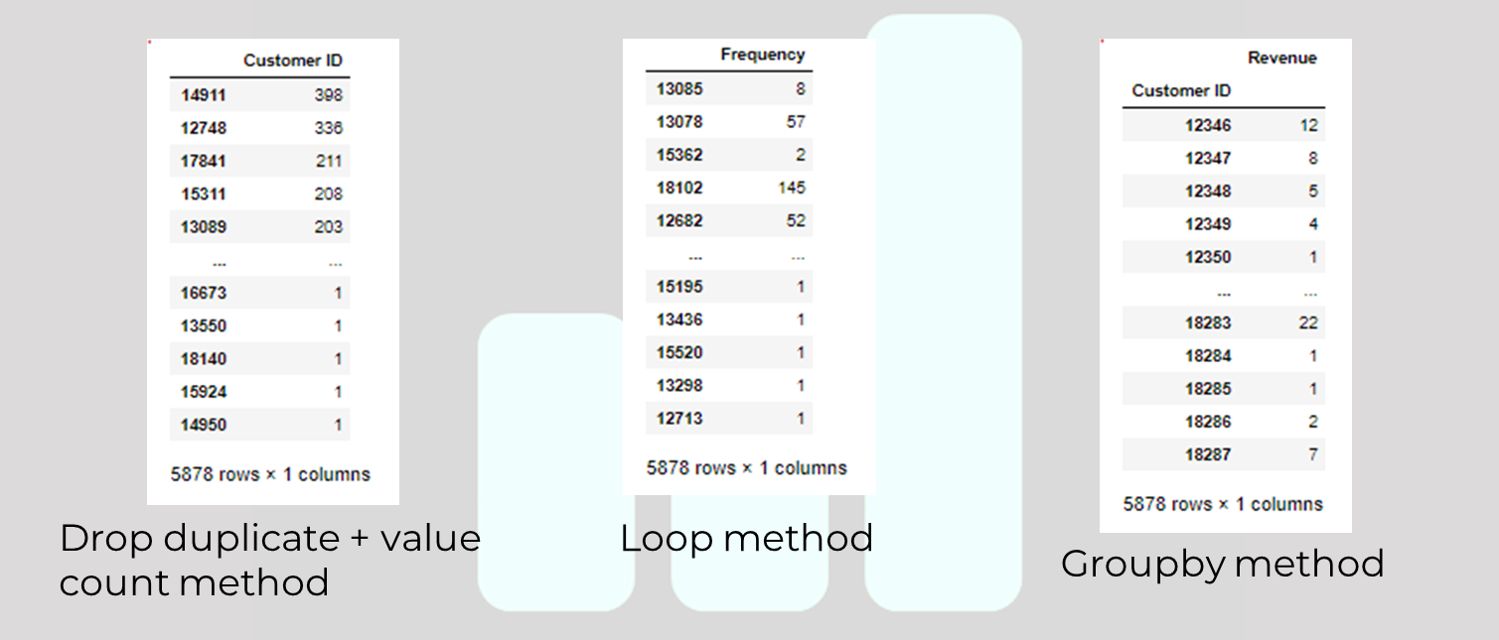

Note that the index and column names are different across all methods. We will change them later.

In [10]:
# Step 9: Get your DataFrame containing Frequency
group2=df.groupby('Customer ID').agg({"Invoice": 'nunique'})
group2.rename(columns={'Invoice': 'Frequency'}, inplace = True)
group2

,Frequency
Customer ID,
12346,12
12347,8
12348,5
12349,4
12350,1
...,...
18283,22
18284,1
18285,1


### Step 10: Get total Revenue per customer
Finally, we calculate the M, i.e. total revenue per customer.

For this, we perform a groupby operation by Customer ID, and followed by a sum operation. 

We will then extract only the Revenue column from the resulting groupyby-sum DataFrame.

Make sure you rename the column to Monetary as well.

In [11]:
# Step 10: Get total Revenue per Customer ID
group3=df.groupby('Customer ID').agg({"Revenue": sum})
group3.rename(columns={'Revenue': 'Monetary'}, inplace = True)
group3

,Monetary
Customer ID,
12346,77556.46
12347,5633.32
12348,2019.40
12349,4428.69
12350,334.40
...,...
18283,2736.65
18284,461.68
18285,427.00


### Step 11: Merge the R, F, and M DataFrames by Customer ID
After you have obtained the three separate DataFrames, it's time to merge them. 

Make sure the the columns are Recency, Frequency, and Monetary.

<strong>Hint: Google "merge more than 2 dataframes in pandas"</strong>

In [12]:
# Step 11: Merge your three DataFrames by Customer ID
from functools import reduce
dfs = [group1, group2, group3]
Merge=reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)
Merge

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,24,8,5633.32
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40
...,...,...,...
18283,25,22,2736.65
18284,453,1,461.68
18285,682,1,427.00


### Step 12: Export the basic RFM DataFrame as CSV
At this point, let's export our hardwork into a CSV first. 

We will need this CSV in the final Part where we use unsupervised machine learning.

In [13]:
# Step 12: Export the DataFrame as CSV
Merge.to_csv('merge_dataset.csv')

## Get the Recency, Frequency, and Monetary scores
Next, we will get the Recency, Frequency, and Monetary scores. Here are the steps involved:

1. Establish a quintile range for all of the values in R/F/M
2. Assign a score based on the quintile the value of R/F/M value is in

![RFMScoreTable.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/RFMScoreTable.png)

pandas has a handy method to <strong><font color = "red">cut</font></strong> your column values into <strong><font color = "red">q</font></strong>uintiles, but you'll have to search for it.

We're gonna throw you more hints this time round because unless you practice a lot with pandas' methods, you probably would have encountered this kind of operation before.

<strong>Hint 1: Google "get quintile column pandas". Google will try to correct you, but make sure you correct it back.</strong>

<strong>Hint 2: Useful reading: https://pbpython.com/pandas-qcut-cut.html</strong>

### Step 13: Get RecencyScore
We will first get the RecencyScore by:
1. Prepare a list containing scores, i.e. 5 to 1
2. <strong><font color = "red">cut</font></strong>ting your column values into <strong><font color = "red">q</font></strong>uintiles
3. Make sure you have the list from point 1 in the labels parameter 
4. Create a column in your DataFrame labelled RecencyScore with your results

<strong>Hint: Remember, the lower the Recency value, the higher the RecencyScore because that customer purchased something recently. Make sure you label the quintiles properly</strong>

In [14]:
# Step 13: Get Recency Score
import numpy as np
RecencyList = np.linspace(5, 1, 5, dtype=int)
Merge['RecencyScore']=pd.qcut(Merge['Recency'], q=5, labels=RecencyList)
Merge

,Recency,Frequency,Monetary,RecencyScore
Customer ID,,,,
12346,347,12,77556.46,2
12347,24,8,5633.32,5
12348,97,5,2019.40,3
12349,40,4,4428.69,5
12350,332,1,334.40,2
...,...,...,...,...
18283,25,22,2736.65,5
18284,453,1,461.68,1
18285,682,1,427.00,1


### Step 14: Get FrequencyScore
Once you have the RecencyScore, it's time to get FrequencyScore. 

However, one thing to note - the method that you used in Step 13 does not play well with columnns that have frequently repeated values. 

As such, you must perform a <strong>rank</strong> operation first.

![RankedFrequency.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/RankedFrequency.png)

We will first get the FrequencyScore by:
1. Prepare a list containing scores, i.e. 1 to 5
2. Rank your Frequency column, by using the first method
3. <strong><font color = "red">cut</font></strong>ting your column values into <strong><font color = "red">q</font></strong>uintiles
4. Make sure you have the list from point 1 in the labels parameter 

<strong>Hint: As opposed to the RecencyScore, the higher the Frequency rank value, i.e. the larger the rank number, the higher the FrequencyScore because that customer purchased something more frequently. Make sure you label the quintiles properly</strong>

<strong>Hint 2: Here's the documentation for rank: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html</strong>

In [15]:
# Step 14: Get your FrequencyScore
FrequencyList = np.linspace(1, 5, 5, dtype=int)
FreqRank = Merge['Frequency'].rank(method='first')
Merge['FrequencyScore']=pd.qcut(FreqRank, q=5, labels=FrequencyList)
Merge

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
Customer ID,,,,,
12346,347,12,77556.46,2,5
12347,24,8,5633.32,5,4
12348,97,5,2019.40,3,4
12349,40,4,4428.69,5,3
12350,332,1,334.40,2,1
...,...,...,...,...,...
18283,25,22,2736.65,5,5
18284,453,1,461.68,1,2
18285,682,1,427.00,1,2


### Step 15: Get MonetaryScore
Repeat what you did with Recency on Monetary to get MonetaryScore

In [16]:
# Step 15: Get MonetaryScore
import numpy as np
MonetaryList = np.linspace(1, 5, 5, dtype=int)
Merge['MonetaryScore']=pd.qcut(Merge['Monetary'], q=5, labels=MonetaryList)
Merge

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,347,12,77556.46,2,5,5
12347,24,8,5633.32,5,4,5
12348,97,5,2019.40,3,4,4
12349,40,4,4428.69,5,3,5
12350,332,1,334.40,2,1,2
...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4
18284,453,1,461.68,1,2,2
18285,682,1,427.00,1,2,2


### Step 16: Get the RFM score
Combine the scores together as strings, so you can have values such as 111, 435, 555, 214, etc. 

You'll have to turn the integer scores into string, followed by string concatenation. 

![RFMScoreTableFinal.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/RFMScoreTableFinal.png)

In [17]:
# Step 16: Create the RFM column
Merge['RFM']=Merge['RecencyScore'].astype(str)+Merge['FrequencyScore'].astype(str)+Merge['MonetaryScore'].astype(str)
Merge

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM
Customer ID,,,,,,,
12346,347,12,77556.46,2,5,5,255
12347,24,8,5633.32,5,4,5,545
12348,97,5,2019.40,3,4,4,344
12349,40,4,4428.69,5,3,5,535
12350,332,1,334.40,2,1,2,212
...,...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4,554
18284,453,1,461.68,1,2,2,122
18285,682,1,427.00,1,2,2,122


### Step 17: Label each customer with the appropriate segment
Now, the segmentation step. There are 5 scores for R,F,M, so you have 5x5x5 = 125 different combinations of segments. However, depending on which school of thought you subscribe to, the segments tend to be grouped together. 

![RFMFigure.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/RFMFigure.png)

In this case, we shall work with 10 segments instead, using only R and F. 

Here are the segments:
1. Hibernating: 11, 12, 21, 22
2. At Risk: 13, 14, 23, 24
3. Can't Lose: 15, 25
4. About to Sleep: 31, 32
5. Need Attention: 33
6. Loyal Customers: 34, 35, 44, 45
7. Promising: 41
8. New Customers: 51
9. Potential Loyalists: 42, 43, 52, 53
10. Champions: 54, 55

There are a few ways to do this but here's what we suggest. 

Use a for loop and replace [Easy]
- Initialize an empty list
- Loop through each row in the DataFrame
- Check the first two strings in the RFM using if/else
- Append the corresponding segment into the list
- Set a new column titled 'Segment' with the empty list

![SegmentDataFrame.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/SegmentDataFrame.png)

If done right, you should see this. 

In [25]:
# Step 17: Segment your customers based on the RF in the RFM score

Segments = {'11':'Hibernating', '12':'Hibernating', '21':'Hibernating', '22':'Hibernating',
            '13':'At Risk', '14':'At Risk', '23':'At Risk', '24':'At Risk',
            '15':"Can't Lose", '25':"Can't Lose",
            '31':'About to Sleep', '32':'About to Sleep',
            '33':'Need Attention',
            '34':'Loyal Customers', '35':'Loyal Customers', '44':'Loyal Customers', '45':'Loyal Customers',
            '41':'Promising',
            '51':'New Customers',
            '42':'Potential Loyalists', '43':'Potential Loyalists', '52':'Potential Loyalists', '53':'Potential Loyalists',
            '54':'Champions', '55':'Champions'}


'''
Hibernating: 11, 12, 21, 22
At Risk: 13, 14, 23, 24
Can't Lose: 15, 25
About to Sleep: 31, 32
Need Attention: 33
Loyal Customers: 34, 35, 44, 45
Promising: 41
New Customers: 51
Potential Loyalists: 42, 43, 52, 53
Champions: 54, 55
'''

Merge['RF']= list(map(lambda x: x[:2], Merge['RFM']))
Merge['Segment'] = Merge['RF'].map(Segments)
Merge

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,RF,Segment
Customer ID,,,,,,,,,
12346,347,12,77556.46,2,5,5,255,25,Can't Lose
12347,24,8,5633.32,5,4,5,545,54,Champions
12348,97,5,2019.40,3,4,4,344,34,Loyal Customers
12349,40,4,4428.69,5,3,5,535,53,Potential Loyalists
12350,332,1,334.40,2,1,2,212,21,Hibernating
...,...,...,...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4,554,55,Champions
18284,453,1,461.68,1,2,2,122,12,Hibernating
18285,682,1,427.00,1,2,2,122,12,Hibernating


Once you have the full RFM table, consider exploring the table further such as:
1. Doing a bar chart on the number of Segments available
2. Performing a groupby operation to see the average amount of money each Segment brings in
3. Average Recency per Segment
4. Average Frequency per Segment

### Step 18: Export your DataFrame as a CSV
Well done! This was a really long section, but you persevered. 

You have successfully performed RFM segmentation, using qcut (you used qcut right?) and assigned a score to each customer ID. 

Time to export the table that you've created. Next, in Part V, we'll finally use unsupervised machine learning techniques to segment the Customers next. We will need the table above to compare notes.

In [26]:
# Step 18: Export your DataFrame as CSV
Merge.to_csv('merge_dataset v0.2.csv')